In [1]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('train.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
import matplotlib.pyplot as plt

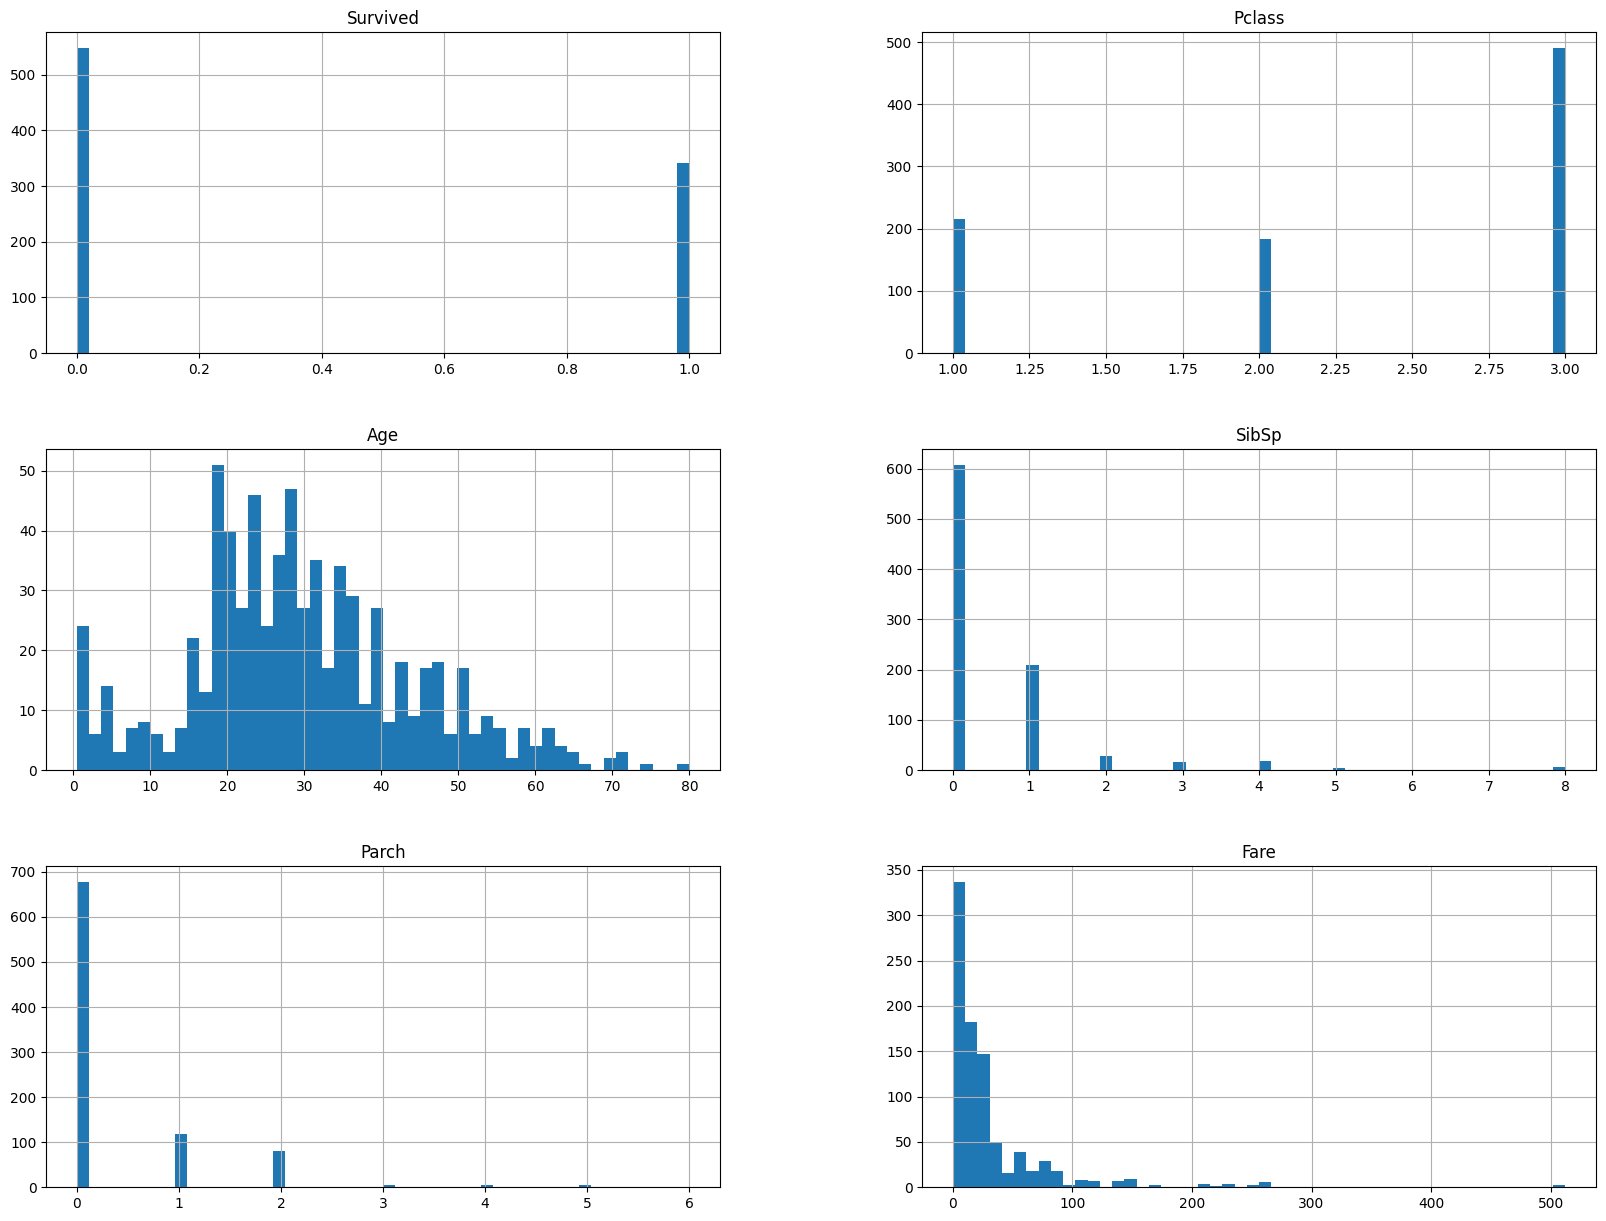

In [13]:
df.drop(columns = 'PassengerId').hist(bins =50 , figsize=(20,15))
plt.show()

In [14]:
(df['Survived'].value_counts()/len(df))*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [16]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/26/5d/1e13b597ed8e54803e9ac6ded18c04cd35d8cbc49016778ec50c4ca9e9d5/plotly-5.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 991.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/15.6 MB 1.3 MB/s eta 0:00:12
   ---------------------------------------- 0.1/15.6 MB 1.0 MB/s eta 0:00:15
    --------------------------------------- 0.2/15.6 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.2/15.6 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.3/15.6 MB 983.9 kB/s eta 0:00:16
    --------------------------------------- 0.4/15.6 M


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [20]:
counts = df['Survived'].value_counts()
counts.rename(index = {0:'Not Survived', 1: 'Survived'}, inplace =True)
fig=px.pie(values=counts , names = counts.index ,
           color_discrete_sequence=['#FF6666', '#6666FF'])
fig.show()

In [23]:
# subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'bar'}]])

sex_counts = df['Sex'].value_counts()
pie = go.Pie(labels=sex_counts.index, values=sex_counts, name='Sex Distribution', marker=dict(colors=['#FF6666', '#6666FF']))

grouped_data = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
bar1 = go.Bar(x=grouped_data[grouped_data['Survived'] == 0]['Sex'], y=grouped_data[grouped_data['Survived'] == 0]['Count'], name='Not Survived')
bar2 = go.Bar(x=grouped_data[grouped_data['Survived'] == 1]['Sex'], y=grouped_data[grouped_data['Survived'] == 1]['Count'], name='Survived')

fig.add_trace(pie, row=1, col=1)
fig.add_trace(bar1, row=1, col=2)
fig.add_trace(bar2, row=1, col=2)

fig.update_layout(barmode='group')
fig.show()

In [25]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value: {p}')

p-value: 1.1973570627755645e-58


In [26]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'bar'}]])

Pclass_counts = df['Pclass'].value_counts()
pie = go.Pie(labels=Pclass_counts.index, values=Pclass_counts, name='Pclass Distribution', marker=dict(colors=['#FF6666', '#6666FF','#FFCC00']))

grouped_data = df.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
bar1 = go.Bar(x=grouped_data[grouped_data['Survived'] == 0]['Pclass'], y=grouped_data[grouped_data['Survived'] == 0]['Count'], name='Not Survived')
bar2 = go.Bar(x=grouped_data[grouped_data['Survived'] == 1]['Pclass'], y=grouped_data[grouped_data['Survived'] == 1]['Count'], name='Survived')

fig.add_trace(pie, row=1, col=1)
fig.add_trace(bar1, row=1, col=2)
fig.add_trace(bar2, row=1, col=2)

fig.update_layout(barmode='group')

fig.show()

In [27]:
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value: {p}')

p-value: 4.549251711298793e-23


In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'bar'}]])

Embar_counts = df['Embarked'].value_counts()
pie = go.Pie(labels=Embar_counts.index, values=Embar_counts, name='Embarkment Distribution', marker=dict(colors=['#FF6666', '#6666FF','#FFCC00']))

grouped_data = df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')
bar1 = go.Bar(x=grouped_data[grouped_data['Survived'] == 0]['Embarked'], y=grouped_data[grouped_data['Survived'] == 0]['Count'], name='Not Survived')
bar2 = go.Bar(x=grouped_data[grouped_data['Survived'] == 1]['Embarked'], y=grouped_data[grouped_data['Survived'] == 1]['Count'], name='Survived')

fig.add_trace(pie, row=1, col=1)
fig.add_trace(bar1, row=1, col=2)
fig.add_trace(bar2, row=1, col=2)

fig.update_layout(barmode='group')
fig.show()

In [30]:
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value: {p}')

p-value: 1.769922284120912e-06


In [31]:
#age groups
bins = [0, 14, 18, 65, float('inf')]
labels = ['children', 'adolescents', 'adults', 'elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [32]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'bar'}]])

# Data for pie chart
Age_counts = df['AgeGroup'].value_counts()
pie = go.Pie(labels=Age_counts.index, values=Age_counts, name='Age Distribution', marker=dict(colors=['#FF6666', '#6666FF','#FFCC00','FFC0CB']))

# Data for bar chart
grouped_data = df.groupby(['AgeGroup', 'Survived']).size().reset_index(name='Count')
bar1 = go.Bar(x=grouped_data[grouped_data['Survived'] == 0]['AgeGroup'], y=grouped_data[grouped_data['Survived'] == 0]['Count'], name='Not Survived')
bar2 = go.Bar(x=grouped_data[grouped_data['Survived'] == 1]['AgeGroup'], y=grouped_data[grouped_data['Survived'] == 1]['Count'], name='Survived')

# Add traces to subplot
fig.add_trace(pie, row=1, col=1)
fig.add_trace(bar1, row=1, col=2)
fig.add_trace(bar2, row=1, col=2)

# Update layout for bar chart to be grouped
fig.update_layout(barmode='group')

# Show the plot"
fig.show()

In [33]:
contingency_table = pd.crosstab(df['AgeGroup'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value: {p}')

p-value: 0.0011485807850068704


In [34]:
#family size
df['Family'] = df['SibSp']+df['Parch']

grouped_family = df.groupby('Family')['Survived'].mean().reset_index()

#line plot
fig = px.line(grouped_family, x='Family', y='Survived', title='Effect of Family Size on Survival Rate')
fig.show()

In [35]:
contingency_table = pd.crosstab(df['Family'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value: {p}')

p-value: 3.579668975443533e-14


In [36]:
fig = px.histogram(df['Fare'])
fig.show()
fig = px.box(df['Fare'], orientation='h')
fig.show()

In [37]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,adults,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,adults,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,adults,0


In [38]:
len(df[df['Fare']==0])

15

In [39]:
df[df['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,adults,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,adults,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,adults,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,adults,0


In [43]:
features =['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family', 'AgeGroup']

df['Sex'].replace(['female','male'],[0,1],inplace=True)

df['AgeGroup'].replace(['children','adolescents','adults','elderly'],[0,1,2,3],inplace=True)

df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [44]:
corr_matrix = df[features].corr()
corr_matrix['Survived'].sort_values(ascending = False)

C:\Users\Sahil\AppData\Local\Temp\ipykernel_17824\1903604950.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Survived    1.000000
Fare        0.257307
Embarked    0.108669
Parch       0.081629
Family      0.016639
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

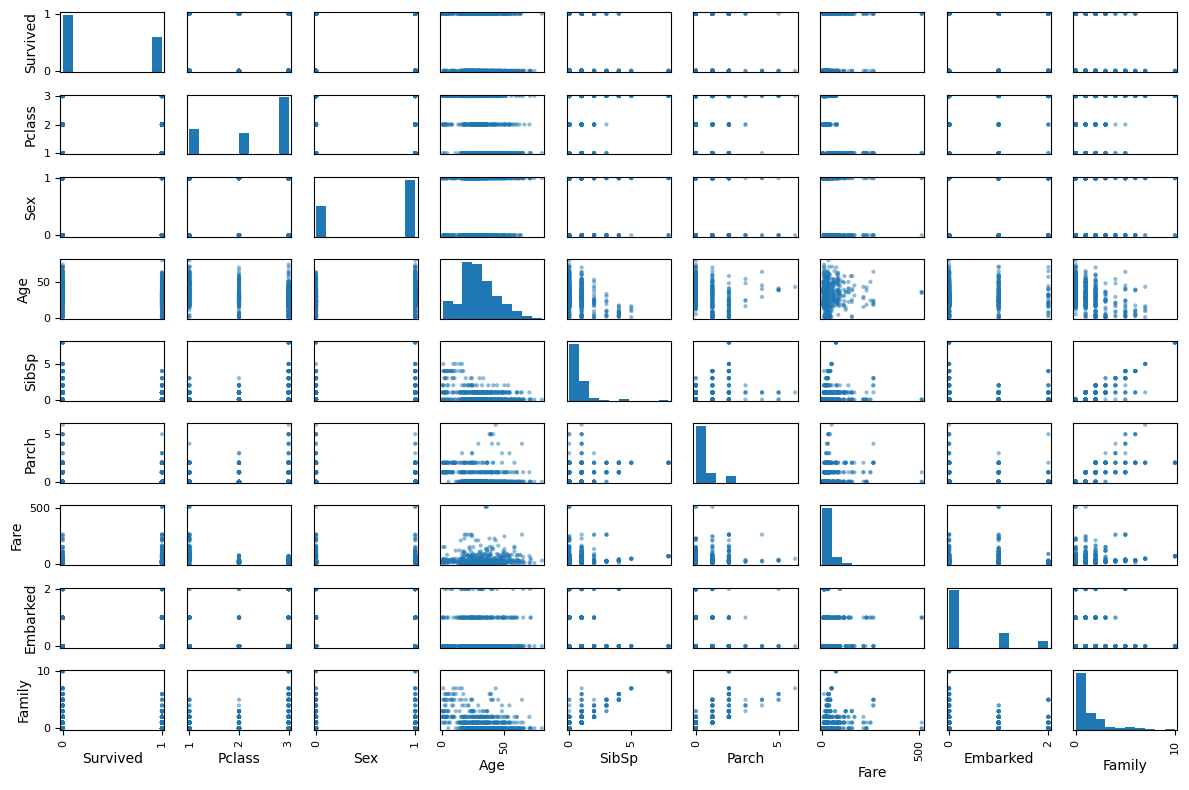

In [45]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[features], figsize=(12, 8))
plt.tight_layout()
plt.show()

In [46]:
df['Age_binary'] = np.where(df['Age'].isna(), np.nan, (df['Age'] <= 18).astype(int))

In [47]:
features.append("Age_binary")

In [48]:
matrix =df[features].corr()
matrix['Survived'].sort_values(ascending = False)

C:\Users\Sahil\AppData\Local\Temp\ipykernel_17824\3947142910.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Survived      1.000000
Fare          0.257307
Embarked      0.108669
Age_binary    0.097545
Parch         0.081629
Family        0.016639
SibSp        -0.035322
Age          -0.077221
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64

In [49]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
Family           0
Age_binary     177
dtype: int64

In [50]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_feat_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_feat_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_feat_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    feat_range = (df[str_feat_name].min(),df[str_feat_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_feat_name].hist()
        plt.xlim = feat_range
        plt.xlabel(str_feat_name)
        plt.title(MV_labels[poss])
    
    plt.show()
    
    group_1_data = df[BM_MV][str_feat_name].dropna()
    group_2_data = df[~BM_MV][str_feat_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Survived:


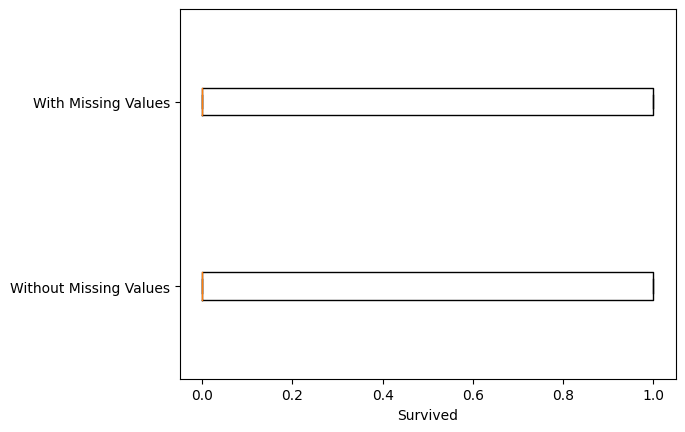

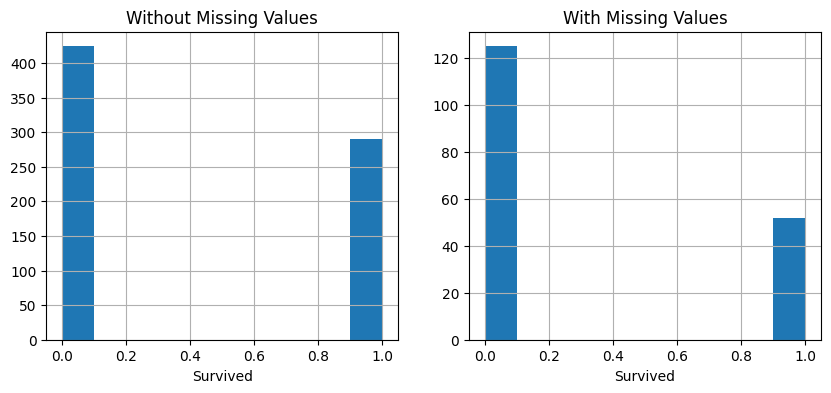

p-value of t-test: 0.005886534840075563
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Pclass:


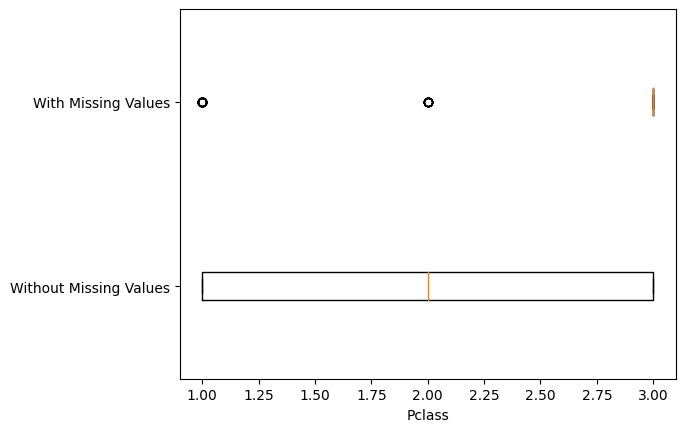

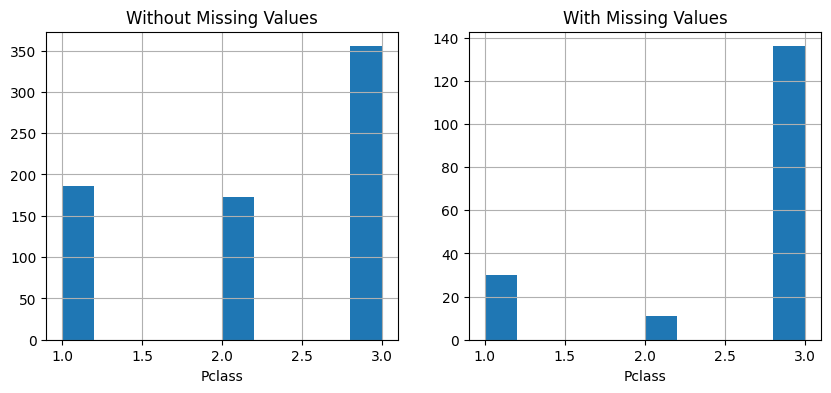

p-value of t-test: 2.0591820872982796e-07
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Sex:


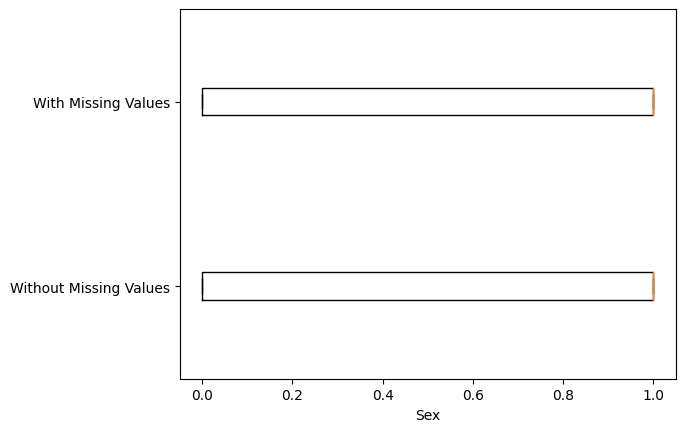

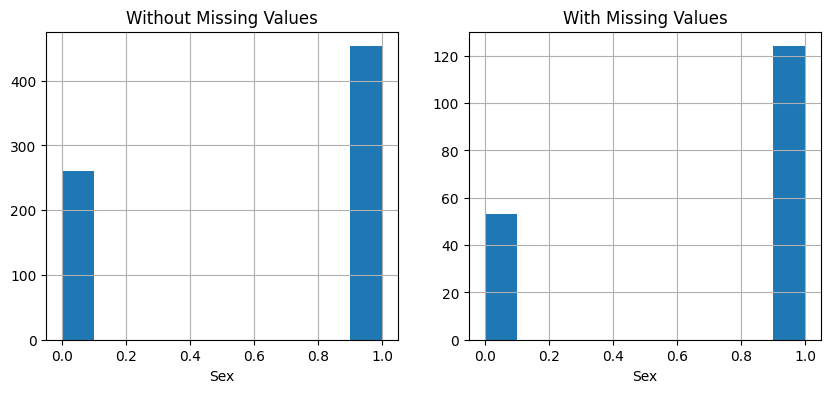

p-value of t-test: 0.09953887308041598
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Age:


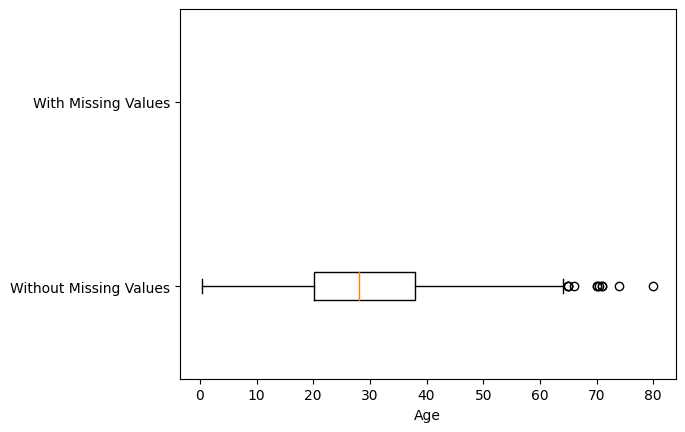

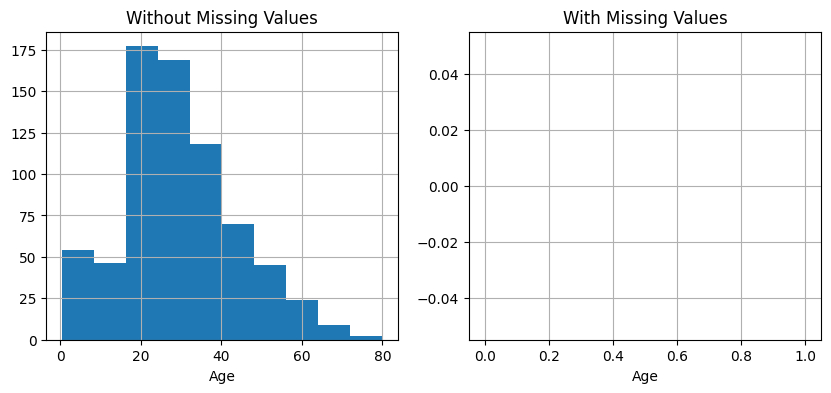

p-value of t-test: nan
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SibSp:


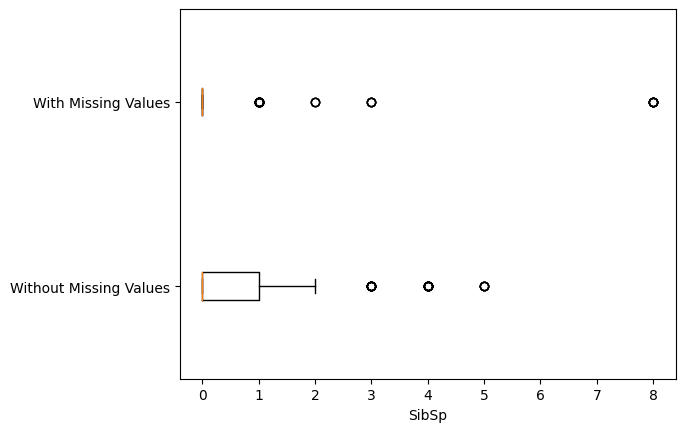

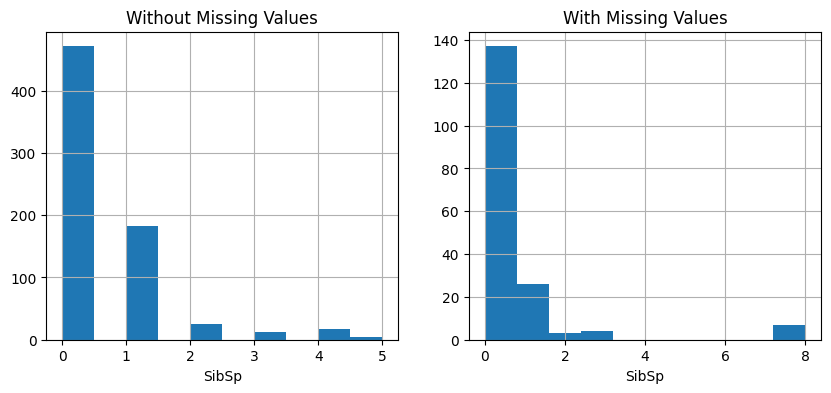

p-value of t-test: 0.5719834805194812
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Parch:


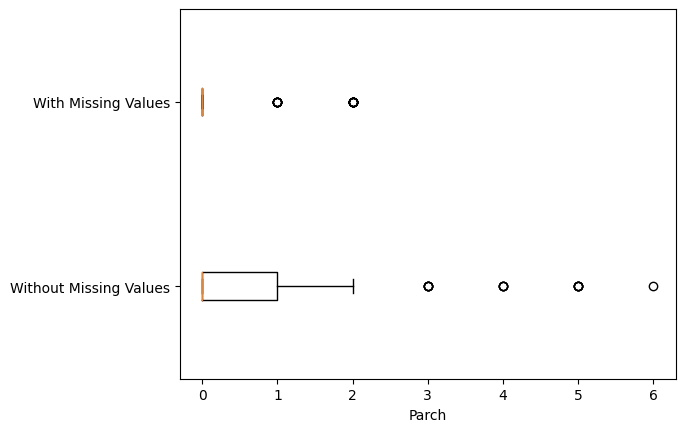

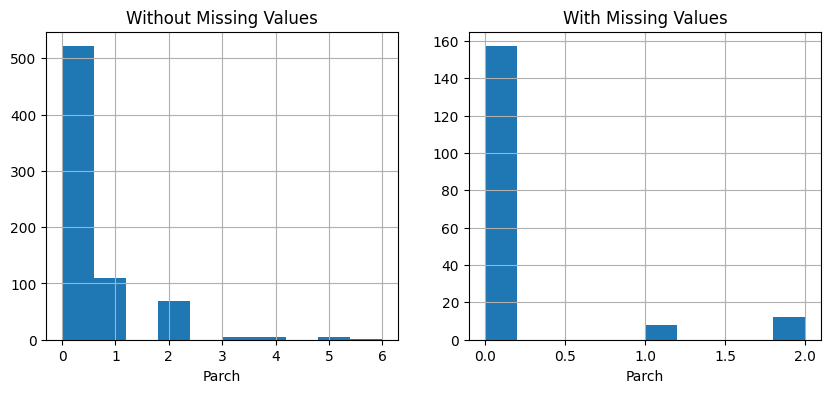

p-value of t-test: 0.00020431778278522542
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Fare:


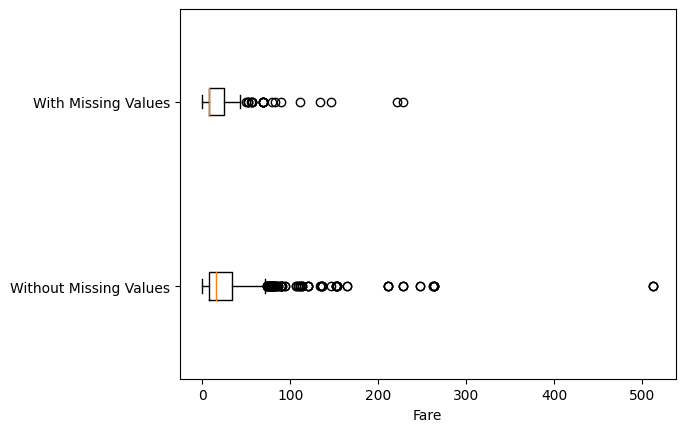

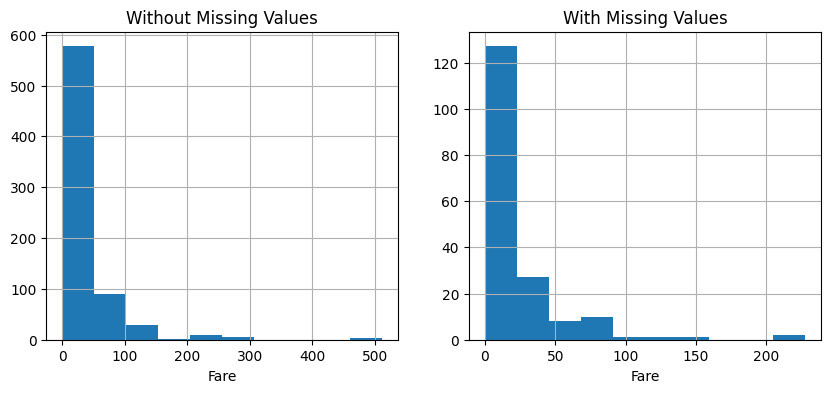

p-value of t-test: 0.002616756065905452
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Embarked:


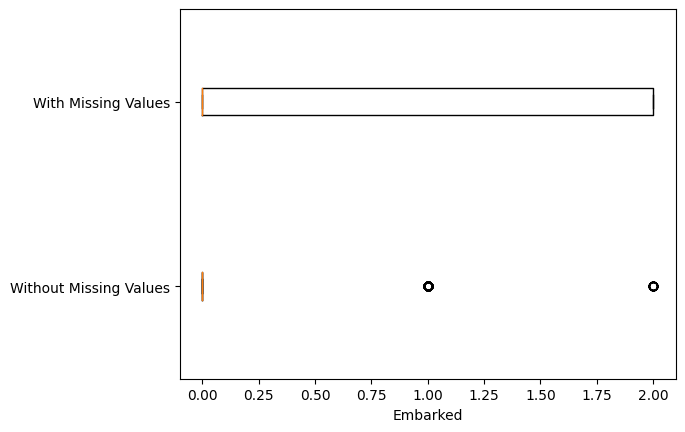

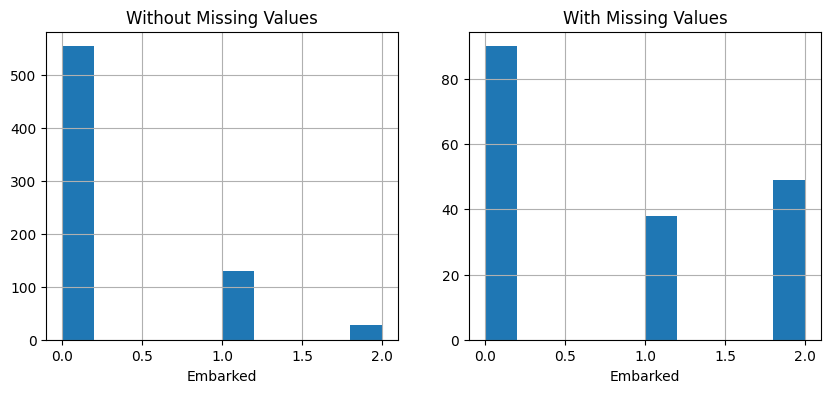

p-value of t-test: 2.0752323299107037e-22
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Family:


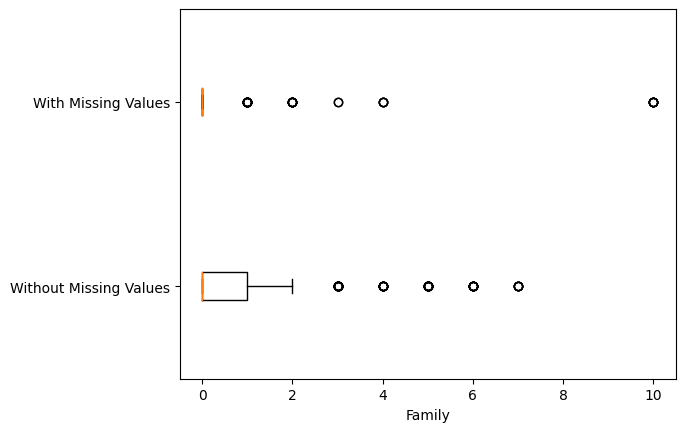

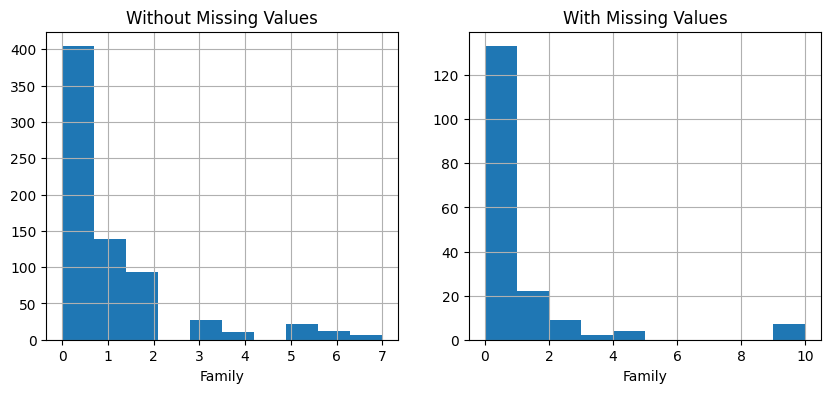

p-value of t-test: 0.14353542797885846
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AgeGroup:


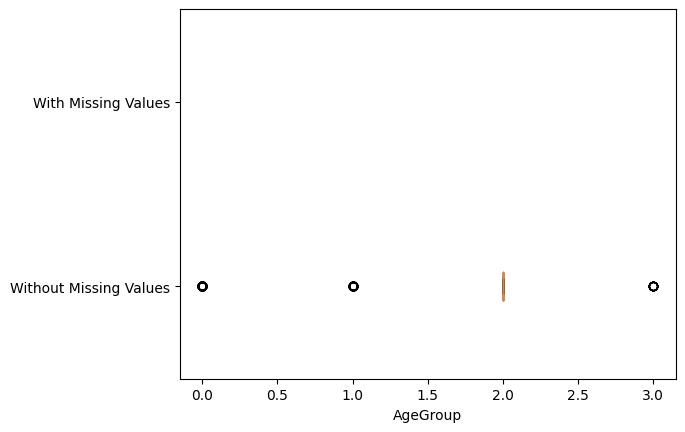

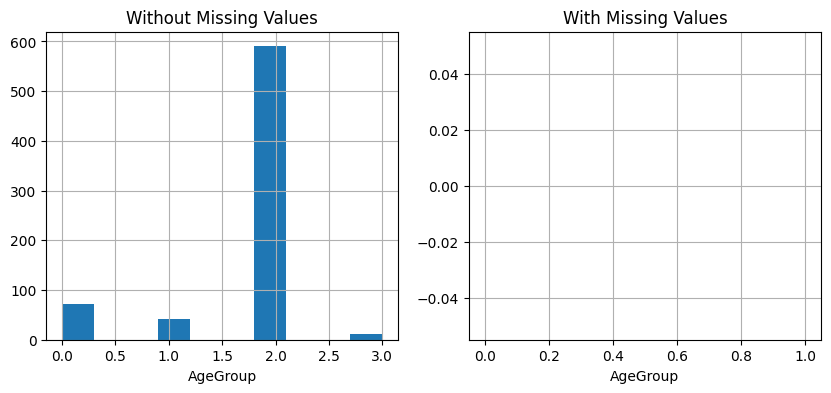

p-value of t-test: nan
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Age_binary:


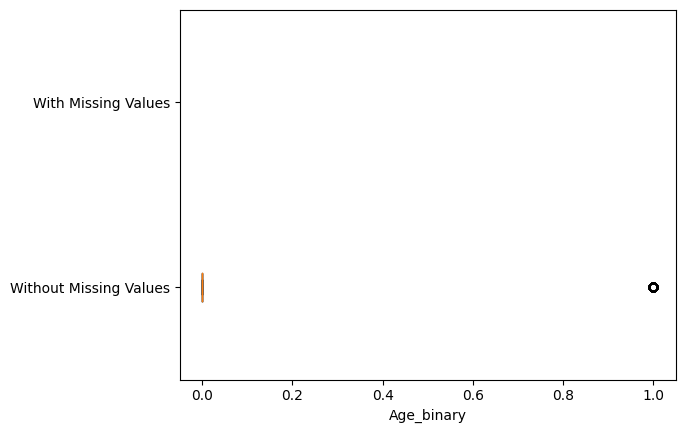

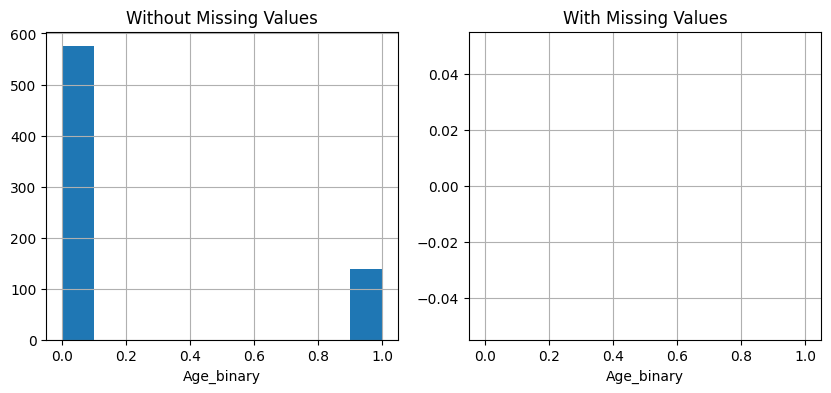

p-value of t-test: nan
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [51]:
BM_MV = df.Age.isna()
for feat in features:
    print('Diagnosis Analysis of Missing Values for {}:'.format(feat))
    Diagnose_MV_Numerical(df,feat,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

In [52]:
#missing data(Age) is linked to the attributes hence simply using average can be bias, so we'll use median
median_ages = df.groupby(['Pclass', 'Embarked'])['Age'].median()

def fill_missing_age(row):
    if pd.isnull(row['Age']):
        return median_ages[row['Pclass'], row['Embarked']]
    else:
        return row['Age']

df['Age'] = df.apply(fill_missing_age, axis=1)

In [53]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df['Age_binary'] = (df['Age'] <= 18).astype(int)
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['AgeGroup'].replace(['children','adolescents','adults','elderly'],[0,1,2,3],inplace=True)

In [54]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
Family           0
Age_binary       0
dtype: int64

C:\Users\Sahil\AppData\Local\Temp\ipykernel_17824\2414663334.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



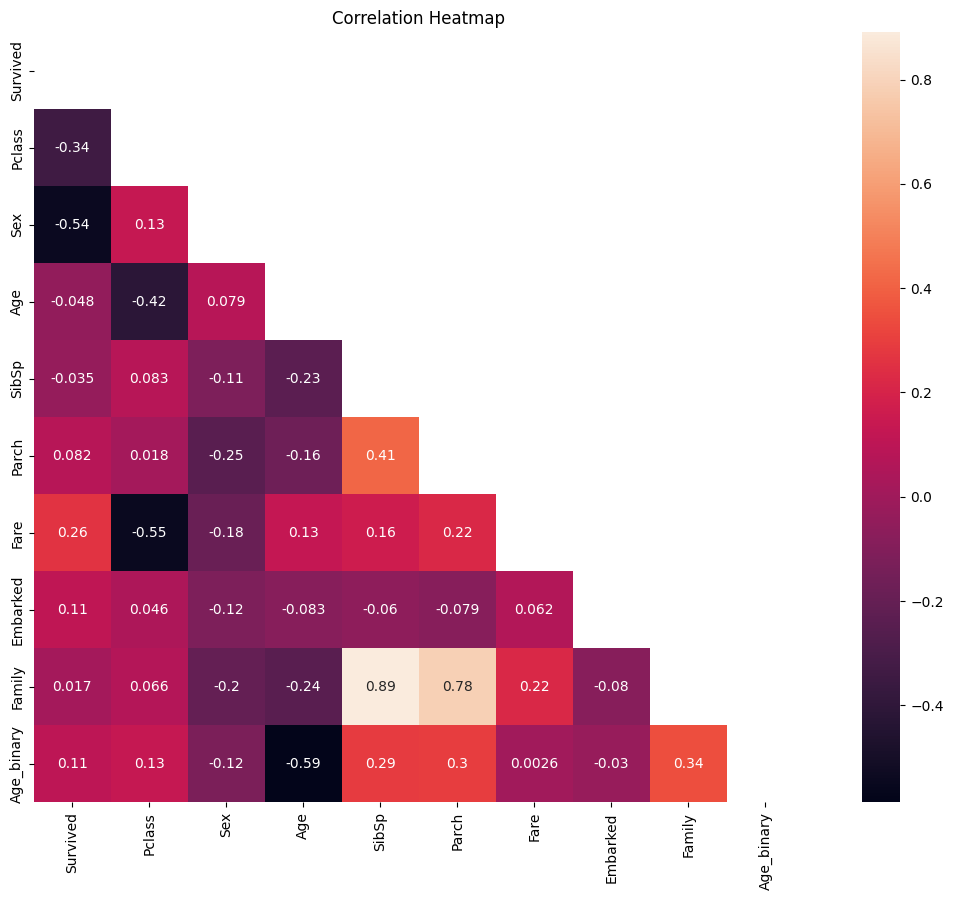

In [55]:
import seaborn as sns
corr_matrix_all = df[features].corr()
mask = np.triu(np.ones_like(corr_matrix_all, dtype=bool))
plt.figure(figsize=(15, 10))
ax = sns.heatmap(data=corr_matrix_all, annot=True, cmap='rocket', mask=mask)

# Customize the plot
ax.set_title('Correlation Heatmap')
ax.set_xticklabels(corr_matrix_all.columns, rotation=90)
ax.set_yticklabels(corr_matrix_all.columns)
ax.set_aspect('equal')
plt.show()

In [56]:
#finally dropping the unnecessary features..
train_df = df.drop(columns =['Name','Age','Ticket','Cabin','PassengerId'])

In [57]:
train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_binary
0,0,3,1,1,0,7.2500,0.0,2,1,0
1,1,1,0,1,0,71.2833,1.0,2,1,0
2,1,3,0,0,0,7.9250,0.0,2,0,0
3,1,1,0,1,0,53.1000,0.0,2,1,0
4,0,3,1,0,0,8.0500,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,0.0,2,0,0
887,1,1,0,0,0,30.0000,0.0,2,0,0
888,0,3,0,1,2,23.4500,0.0,2,3,0
889,1,1,1,0,0,30.0000,1.0,2,0,0


In [58]:
from sklearn.preprocessing import MinMaxScaler
train_df['Fare'] = np.log1p(train_df['Fare'])
scaler = MinMaxScaler()
train_df[['Fare']] = scaler.fit_transform(train_df[['Fare']])

In [59]:
train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_binary
0,0,3,1,1,0,0.338125,0.0,2,1,0
1,1,1,0,1,0,0.685892,1.0,2,1,0
2,1,3,0,0,0,0.350727,0.0,2,0,0
3,1,1,0,1,0,0.639463,0.0,2,1,0
4,0,3,1,0,0,0.352955,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0.422864,0.0,2,0,0
887,1,1,0,0,0,0.550238,0.0,2,0,0
888,0,3,0,1,2,0.512205,0.0,2,3,0
889,1,1,1,0,0,0.550238,1.0,2,0,0


In [60]:
test_df = pd.read_csv('test.csv')

In [61]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
test_df['Sex'].replace(['female','male'],[0,1],inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [63]:
test_df["Fare"].fillna(test_df['Fare'].mode()[0], inplace =True)
test_df['Age'] = test_df.apply(fill_missing_age, axis=1)


In [64]:
test_df['Age_binary'] = (test_df['Age'] <= 18).astype(int)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)
test_df['AgeGroup'].replace(['children','adolescents','adults','elderly'],[0,1,2,3],inplace=True)

In [65]:
test_df.drop(columns =['Name','Age','Ticket','Cabin','PassengerId'], inplace=True)

In [66]:
test_df['Fare'] = np.log1p(test_df['Fare'])
test_df[['Fare']] = scaler.transform(test_df[['Fare']])

In [67]:
test_df

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_binary,AgeGroup
0,3,1,0,0,0.348997,2,0,2
1,3,0,1,0,0.333195,0,0,2
2,2,1,0,0,0.379604,2,0,2
3,3,1,0,0,0.363449,0,0,2
4,3,0,1,1,0.414494,0,0,2
...,...,...,...,...,...,...,...,...
413,3,1,0,0,0.352955,0,0,2
414,1,0,0,0,0.753026,1,0,2
415,3,1,0,0,0.338125,0,0,2
416,3,1,0,0,0.352955,0,0,2


In [68]:
# let's start model selection...

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train['AgeGroup'] = X_train['AgeGroup'].astype(int)
X_val['AgeGroup'] = X_val['AgeGroup'].astype(int)
test_df['AgeGroup'] = test_df['AgeGroup'].astype(int)

In [74]:
!pip install xgboost


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [76]:
def fit_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

KNN Accuracy: 0.8100558659217877
SVM Accuracy: 0.8156424581005587
Decision Tree Accuracy: 0.8100558659217877
Random Forest Accuracy: 0.8100558659217877
XGBoost Accuracy: 0.8212290502793296


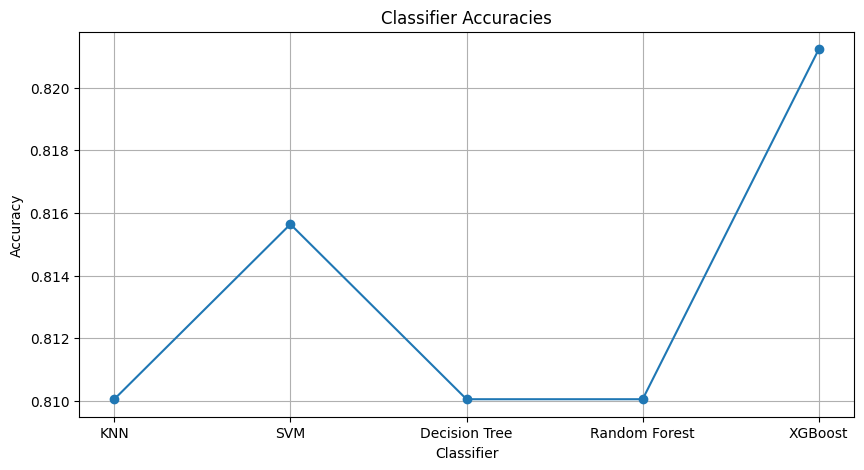

In [77]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

classifiers = [knn, svm, decision_tree, random_forest, xgb]
classifier_names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = []
for model, name in zip(classifiers, classifier_names):
    acc = fit_and_evaluate(model, X_train, y_train, X_val, y_val)
    print(f'{name} Accuracy: {acc}')
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(classifier_names, accuracies, marker='o')
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, refit=True, verbose=2)
grid_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost: ", grid_xgb.best_params_)

xgb_best = grid_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_val)
print('Tuned XGBoost Accuracy:', accuracy_score(y_val, y_pred_xgb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.

In [80]:
print('Tuned XGBoost Accuracy:', accuracy_score(y_val, y_pred_xgb))

Tuned XGBoost Accuracy: 0.8100558659217877


In [ ]:
#Best performing model is XGBoost...